In [29]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
from tqdm import tqdm_notebook 
import seaborn as sns
from IPython.display import HTML
from sklearn.preprocessing import StandardScaler


from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs

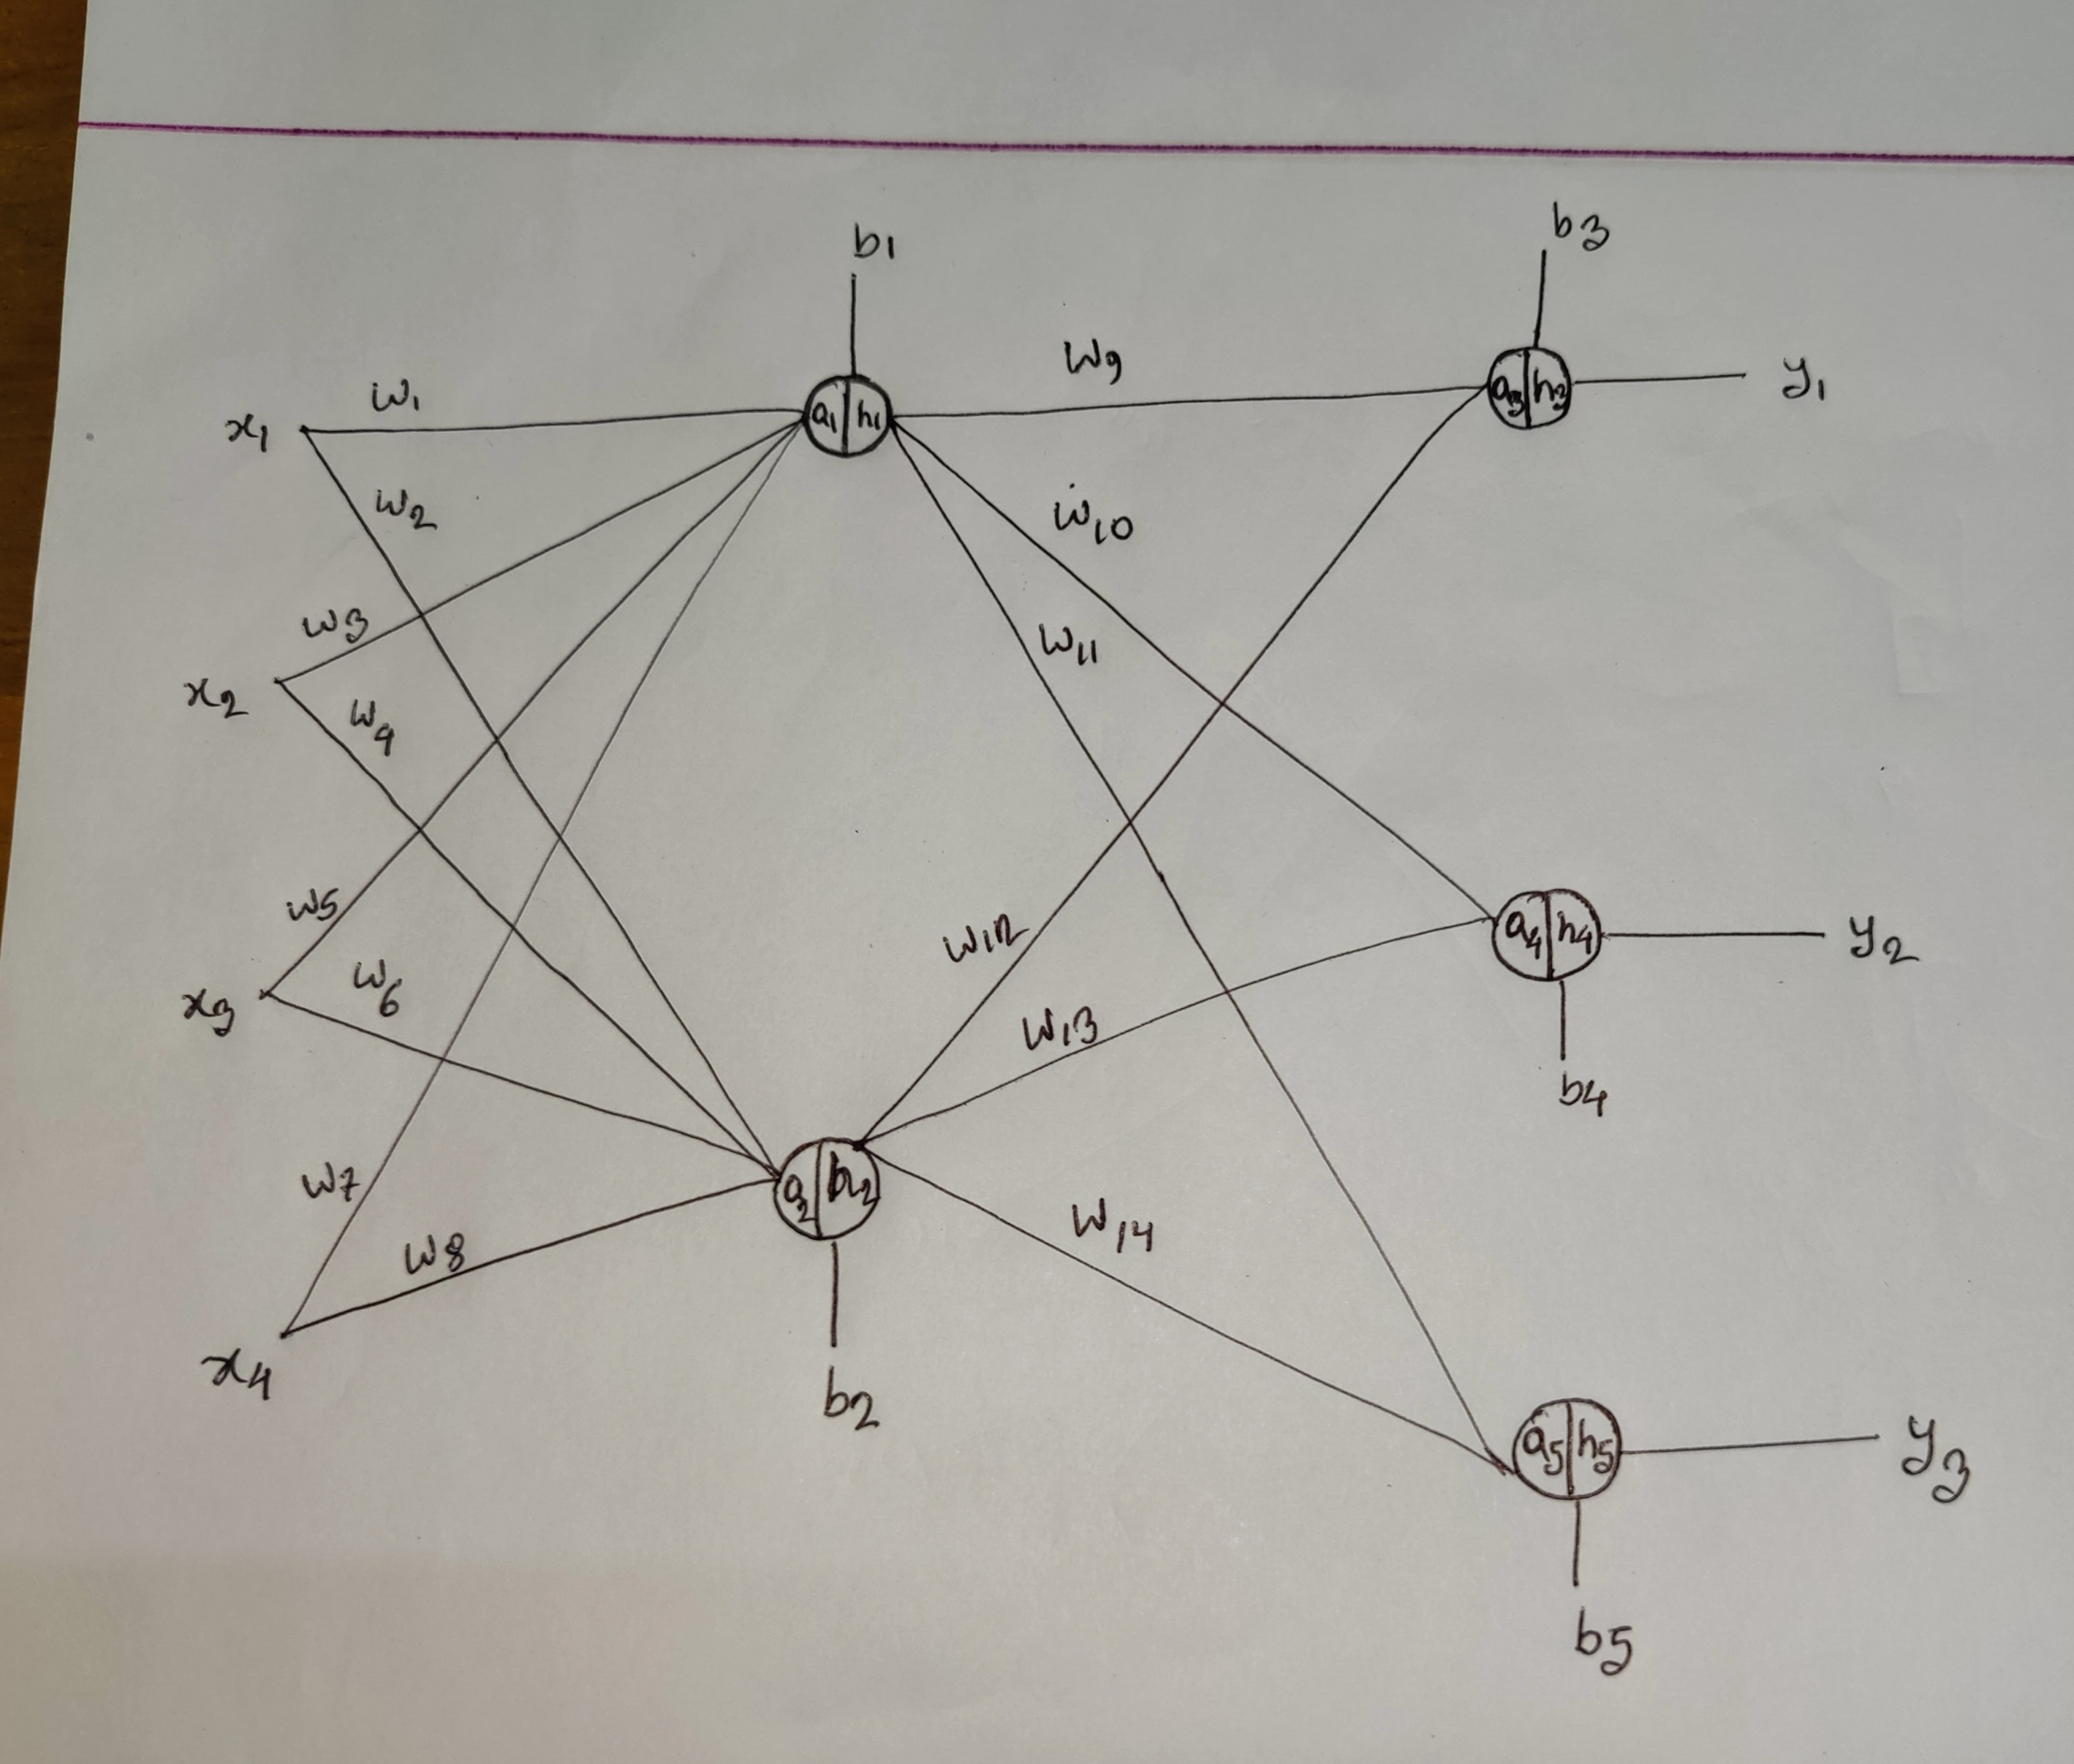

In [30]:
class FFSN_MultiClass_Specific:
  
  def __init__(self):
    np.random.seed(0)
    self.w1 = np.random.randn()
    self.w2 = np.random.randn()
    self.w3 = np.random.randn()
    self.w4 = np.random.randn()
    self.w5 = np.random.randn()
    self.w6 = np.random.randn()
    self.w7 = np.random.randn()
    self.w8 = np.random.randn()
    self.w9 = np.random.randn()
    self.w10 = np.random.randn()
    self.w11 = np.random.randn()
    self.w12 = np.random.randn()
    self.w13 = np.random.randn()
    self.w14 = np.random.randn()
    self.b1 = 0
    self.b2 = 0
    self.b3 = 0
    self.b4 = 0
    self.b5 = 0
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def forward_pass(self, x):
    # input layer
    self.x1, self.x2, self.x3, self.x4 = x
    
    # hidden layer
    self.a1 = self.w1*self.x1 + self.w3*self.x2 + self.w5*self.x3 + self.w7*self.x4 + self.b1
    self.h1 = self.sigmoid(self.a1)
    self.a2 = self.w2*self.x1 + self.w4*self.x2 + self.w6*self.x3 + self.w8*self.x4 + self.b2
    self.h2 = self.sigmoid(self.a2)
    
    # output layer
    self.a3 = self.w9*self.h1 + self.w12*self.h2 + self.b3
    self.a4 = self.w10*self.h1 + self.w13*self.h2 + self.b4
    self.a5 = self.w11*self.h1 + self.w14*self.h2 + self.b5
    sum_exps = np.sum([np.exp(self.a3), np.exp(self.a4), np.exp(self.a5)])
    self.h3 = np.exp(self.a3)/sum_exps
    self.h4 = np.exp(self.a4)/sum_exps
    self.h5 = np.exp(self.a5)/sum_exps
    
    return np.array([self.h3, self.h4, self.h5])
  
  def grad(self, x, y):
    self.forward_pass(x)
    self.y1, self.y2, self.y3= y
    
    self.dw9 = (self.h3-self.y1) * self.h1 
    self.dw12 = (self.h3-self.y1) * self.h2
    self.db3 = (self.h3-self.y1)
                    
    self.dw10 = (self.h4-self.y2) * self.h1
    self.dw13 = (self.h4-self.y2) * self.h2
    self.db4 = (self.h4-self.y2)
    
    self.dw11 = (self.h5-self.y3) * self.h1
    self.dw14 = (self.h5-self.y3) * self.h2
    self.db5 = (self.h5-self.y3)
                    
    self.dh1 = (self.h3-self.y1)*self.w9 + (self.h4-self.y2)*self.w10 + (self.h5-self.y3)*self.w11
    self.dw1 = self.dh1 * self.h1*(1-self.h1) * self.x1
    self.dw3 = self.dh1 * self.h1*(1-self.h1) * self.x2
    self.dw5 = self.dh1 * self.h1*(1-self.h1) * self.x3
    self.dw7 = self.dh1 * self.h1*(1-self.h1) * self.x4
    self.db1 = self.dh1 * self.h1*(1-self.h1)
                    
    self.dh2 = (self.h3-self.y1)*self.w12 + (self.h4-self.y2)*self.w13 + (self.h5-self.y3)*self.w14
    self.dw2 = self.dh2 * self.h2*(1-self.h2) * self.x1
    self.dw4 = self.dh2 * self.h2*(1-self.h2) * self.x2
    self.dw6 = self.dh2 * self.h2*(1-self.h2) * self.x3
    self.dw8 = self.dh2 * self.h2*(1-self.h2) * self.x4
    self.db2 = self.dh2 * self.h2*(1-self.h2)
    
  
  def fit(self, X, Y, epochs=1, learning_rate=1, display_loss=False, display_weight=False):
      
    if display_loss:
      loss = {}
    
    for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dw1, dw2, dw3, dw4, dw5, dw6, dw7, dw8, dw9, dw10, dw11, dw12, dw13, dw14, db1, db2, db3, db4, db5  = [0]*19
      for x, y in zip(X, Y):
        self.grad(x, y)
        dw1 += self.dw1
        dw2 += self.dw2
        dw3 += self.dw3
        dw4 += self.dw4
        dw5 += self.dw5
        dw6 += self.dw6
        dw7 += self.dw7
        dw8 += self.dw8
        dw9 += self.dw9
        dw10 += self.dw10
        dw11 += self.dw11
        dw12 += self.dw12
        dw13 += self.dw13
        dw14 += self.dw14
        db1 += self.db1
        db2 += self.db2
        db3 += self.db3
        db4 += self.db4
        db5 += self.db5
        
      m = X.shape[0]
      self.w1 -= learning_rate * dw1 / m
      self.w2 -= learning_rate * dw2 / m
      self.w3 -= learning_rate * dw3 / m
      self.w4 -= learning_rate * dw4 / m
      self.w5 -= learning_rate * dw5 / m
      self.w6 -= learning_rate * dw6 / m
      self.w7 -= learning_rate * dw7 / m
      self.w8 -= learning_rate * dw8 / m
      self.w9 -= learning_rate * dw9 / m
      self.w10 -= learning_rate * dw10 / m
      self.w11 -= learning_rate * dw11 / m
      self.w12 -= learning_rate * dw12 / m
      self.w13 -= learning_rate * dw13 / m
      self.w14 -= learning_rate * dw14 / m
      self.b1 -= learning_rate * db1 / m
      self.b2 -= learning_rate * db2 / m
      self.b3 -= learning_rate * db3 / m
      self.b4 -= learning_rate * db4 / m
      self.b5 -= learning_rate * db5 / m
      
      if display_loss:
        Y_pred = self.predict(X)
        loss[i] = log_loss(np.argmax(Y, axis=1), Y_pred)
        
      if display_weight:
        weight_matrix = np.array([[self.b3, self.w5, self.w6, 
                                   self.b4, self.w7, self.w8, 
                                   self.b5, self.w9, self.w10, 
                                   self.b6, self.w11, self.w12], 
                                  [0, 0, 0,
                                   self.b1, self.w1, self.w2,
                                   self.b2, self.w3, self.w4, 
                                   0, 0, 0]])
        weight_matrices.append(weight_matrix)
    
    if display_loss:
      plt.plot(loss.values())
      plt.xlabel('Epochs')
      plt.ylabel('Log Loss')
      plt.show()
      
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred)

In [31]:
df = pd.read_csv("data-set.csv")
df.head()

,Cgpa,Age,IETLS,Publications,University
0,3.50,28,5.4,6,California
1,3.79,25,3.0,1,Toronto
2,3.90,22,8.5,20,Stanford
3,3.58,27,5.3,7,California
4,3.78,26,3.4,2,Toronto


In [32]:
y = df['University']
x = df.drop(['University'], axis=1)

In [63]:
X_train, X_val, Y_train, Y_val = train_test_split(x, y, random_state=0)
print(X_train.shape, X_val.shape, y.shape)

(36, 4) (12, 4) (48,)


In [64]:
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_val=sc.transform(X_val)
print(X_train.shape, X_val.shape, y.shape)

(36, 4) (12, 4) (48,)


In [65]:
enc = OneHotEncoder()
y_OH_train = enc.fit_transform(np.expand_dims(Y_train,1)).toarray()
y_OH_val = enc.fit_transform(np.expand_dims(Y_val,1)).toarray()
print(y_OH_train.shape, y_OH_val.shape)

(36, 3) (12, 3)


In [66]:
ffsn_multi_specific = FFSN_MultiClass_Specific()
ffsn_multi_specific.fit(X_train,y_OH_train,epochs=1000,learning_rate=1)

C:\Users\imirf\AppData\Local\Temp/ipykernel_15724/609217666.py:124: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):


  0%|          | 0/1000 [00:00<?, ?epoch/s]

In [82]:
Y_pred_train = ffsn_multi_specific.predict(X_train)
Y_pred_train = np.argmax(Y_pred_train,1)

Y_pred_val = ffsn_multi_specific.predict(X_val)
Y_pred_val = np.argmax(Y_pred_val,1)

new_y_OH_val = np.argmax(y_OH_val,1)
new_y_OH_train = np.argmax(y_OH_train,1)


accuracy_train = accuracy_score(Y_pred_train, new_y_OH_train)
accuracy_val = accuracy_score(Y_pred_val, new_y_OH_val)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 1.0
Validation accuracy 1.0


In [89]:
qry = np.argmax(ffsn_multi_specific.predict([[3,12,9,10]]),1)
qry

array([0], dtype=int64)